# Various import

In [237]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, recall_score,precision_score, roc_auc_score, mean_absolute_error, explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, plot_confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

# EDA

## Import train data and quick clean

In [238]:
pd.options.display.max_columns = 50

In [239]:
df_train = pd.read_csv("src/train.csv")
df_train

,accident_id,year,longitude,latitude,department,accident_type,road_category,address_nbr,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country
0,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,NaN,1.0,2.0,A
1,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,NaN,1.0,2.0,A
2,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,NaN,1.0,2.0,A
3,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,NaN,1.0,2.0,A
4,x0160000000x,2016.0,0.0,0.0,590,2,3.0,39.0,1.0,NaN,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,NaN,16.0,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,x019984107019,2019.0,-2.983499,55.215407,98,1,3.0,7,6.0,60.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0,B
2221214,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221215,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221216,x019984107419,2019.0,-2.997491,55.148292,98,1,6.0,0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0,B


In [240]:
df_train.describe()

,year,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month
count,2.221218e+06,2.221218e+06,2.221218e+06,2.217470e+06,1.455257e+06,2.221218e+06,2.107009e+06,2.221218e+06,2.221163e+06,2.216632e+06,2.220588e+06,2.103254e+06,2.103254e+06,2.171445e+06,2.171096e+06,1.405570e+06,2.221218e+06,2.221218e+06
mean,2.017434e+03,1.192311e+00,3.605706e+00,3.655895e+00,4.371572e+01,2.299994e+00,9.043103e-02,1.933590e+00,1.571223e+00,1.292201e+00,4.058412e-01,1.334694e+00,1.363304e+00,1.074664e+01,1.080861e+01,1.062309e+00,1.568271e+01,6.634006e+00
std,1.121000e+00,3.941163e-01,1.454767e+00,2.085131e+00,1.980759e+01,5.102454e+00,9.552416e-01,1.591726e+00,1.652863e+00,8.060389e-01,1.977707e+00,5.903455e-01,4.843725e-01,1.062200e+01,1.237133e+01,1.333206e+00,8.716023e+00,3.401662e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00
25%,2.016000e+03,1.000000e+00,3.000000e+00,2.000000e+00,3.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,8.000000e+00,4.000000e+00
50%,2.017000e+03,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,1.000000e+00,1.600000e+01,7.000000e+00
75%,2.018000e+03,1.000000e+00,4.000000e+00,6.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00,1.800000e+01,2.000000e+00,2.300000e+01,1.000000e+01
max,2.019000e+03,2.000000e+00,9.000000e+00,9.000000e+00,8.000000e+02,9.900000e+01,9.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.700000e+01,4.000000e+00,9.000000e+00,9.900000e+01,9.900000e+01,1.200000e+01,3.100000e+01,1.200000e+01


In [241]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221218 entries, 0 to 2221217
Data columns (total 24 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   accident_id                         object 
 1   year                                float64
 2   longitude                           object 
 3   latitude                            object 
 4   department                          object 
 5   accident_type                       int64  
 6   road_category                       float64
 7   address_nbr                         object 
 8   traffic_type                        float64
 9   speed_limitation                    float64
 10  intersection                        float64
 11  pedestrian_localisation             float64
 12  light_condition                     float64
 13  weather_conditions                  float64
 14  road_condition                      float64
 15  obstacle_hit_type                   float64
 16  

In [242]:
df_train.duplicated().sum()

491812

In [243]:
df_train = df_train.drop_duplicates()

In [244]:
(df_train == '').sum()

accident_id                           0
year                                  0
longitude                             0
latitude                              0
department                            0
accident_type                         0
road_category                         0
address_nbr                           0
traffic_type                          0
speed_limitation                      0
intersection                          0
pedestrian_localisation               0
light_condition                       0
weather_conditions                    0
road_condition                        0
obstacle_hit_type                     0
person_type                           0
person_sex                            0
vehicule_type                         0
principal_maneuver_before_accident    0
vehicule_motor_type                   0
day                                   0
month                                 0
country                               0
dtype: int64

### checking missing values and replacing them

<AxesSubplot:>

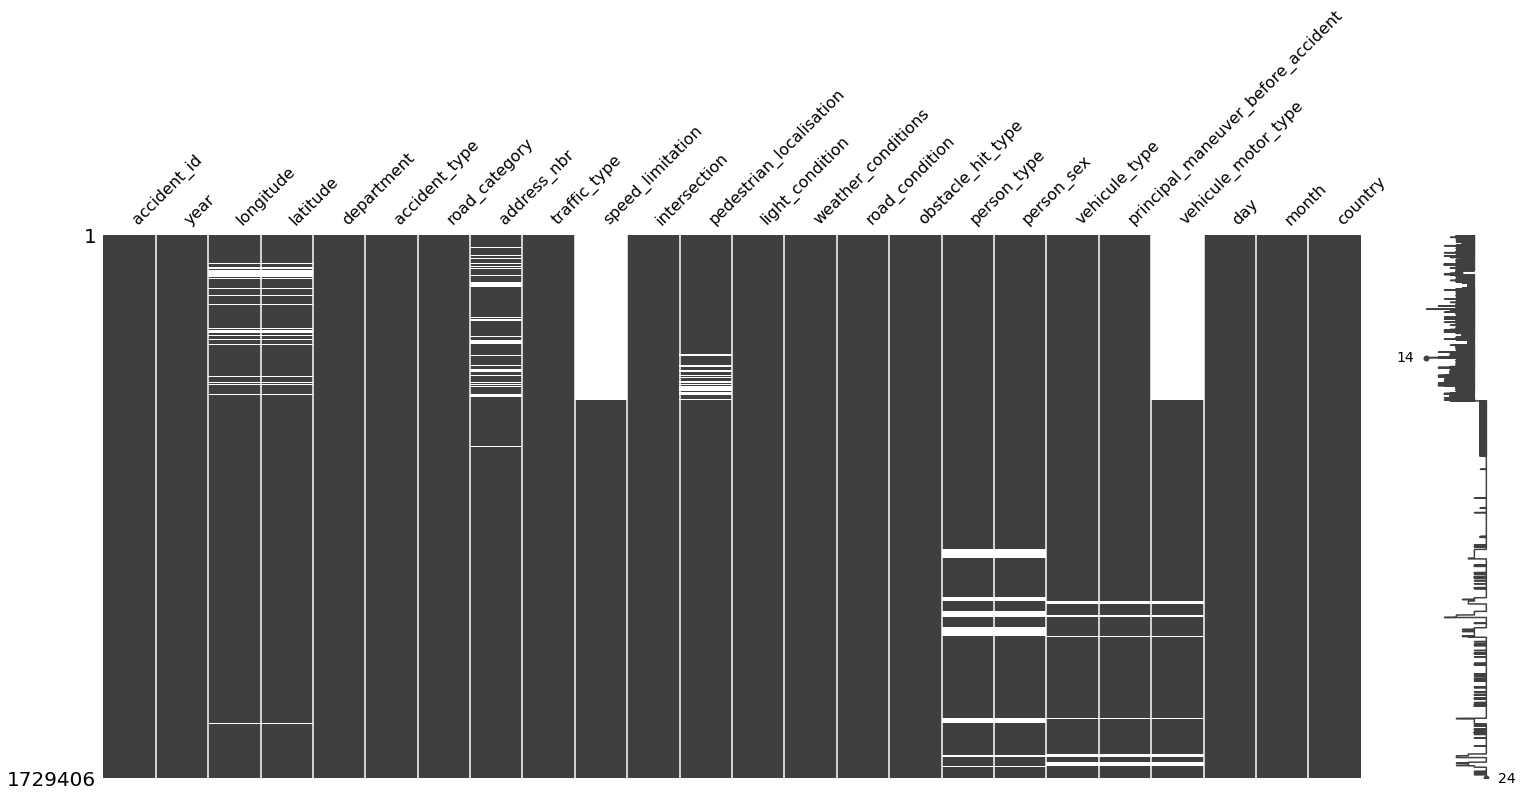

In [245]:
msno.matrix(df_train)

In [246]:
df_train = df_train.fillna(-1)

### clean year

In [247]:
df_train["year"] = df_train["year"].astype(int)

### clean latitude longitude

In [248]:
df_train[df_train["country"]== "A"][["latitude","longitude"]]

,latitude,longitude
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1019358,"48,7772890","2,2237590"
1019359,"48,8351236","2,1751101"
1019360,"48,8351236","2,1751101"
1019361,"48,8351236","2,1751101"


In [249]:
df_train[df_train["country"]== "B"][["latitude","longitude"]]

,latitude,longitude
1019363,51.584754,-0.279323
1019364,51.584754,-0.279323
1019365,51.449595,0.184928
1019366,51.543563,-0.473837
1019367,51.404958,-0.164442
...,...,...
2221210,55.215407,-2.983499
2221211,55.215407,-2.983499
2221214,54.991685,-3.274645
2221216,55.148292,-2.997491


replace , by .

In [250]:
df_train[["latitude","longitude"]] = df_train[["latitude","longitude"]].astype(str).apply(lambda x: x.str.replace(',','.'))

### clean department

In [251]:
df_train[df_train["country"]== "A"]["department"].unique()

array([590, 620, 800, 20, 600, 570, 760, 270, 350, 220, 290, 560, 140,
       500, 940, 10, 610, 440, 490, 530, 720, 850, 330, 170, 240, 400,
       470, 640, 860, 160, 790, 870, 190, 230, 310, 90, 120, 380, 320,
       460, 650, 810, 690, 820, 70, 260, 420, 730, 740, 630, 30, 150, 430,
       540, 550, 880, 670, 680, 510, 80, 100, 520, 210, 580, 710, 890,
       250, 40, 390, 700, 900, 130, 50, 60, 830, 840, 340, 110, 300, 480,
       660, 201, 202, 780, 910, 280, 950, 770, 450, 180, 360, 370, 410,
       920, 930, 750, 972, 971, 973, 974, 976, '750', '972', '971', '973',
       '974', '976', '93', '92', '94', '87', '69', '38', '34', '13',
       '988', '2B', '91', '86', '83', '80', '78', '77', '76', '72', '71',
       '67', '66', '64', '60', '51', '50', '49', '45', '37', '35', '33',
       '31', '30', '29', '22', '19', '18', '17', '74', '81', '2', '59',
       '95', '63', '62', '2A', '84', '9', '73', '43', '10', '36', '16',
       '7', '21', '40', '24', '4', '85', '27', '28', '52', '

In [252]:
df_train[df_train["country"]== "B"]["department"].unique()

array(['1', '48', 1, 48, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16, 17, 20,
       21, 22, 23, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45,
       46, 47, 50, 52, 53, 54, 55, 60, 61, 62, 63, 91, 92, 93, 94, 95, 96,
       97, 98], dtype=object)

In [253]:
df_train["department"] = df_train["department"].astype(str)
df_train["department"].unique()

array(['590', '620', '800', '20', '600', '570', '760', '270', '350',
       '220', '290', '560', '140', '500', '940', '10', '610', '440',
       '490', '530', '720', '850', '330', '170', '240', '400', '470',
       '640', '860', '160', '790', '870', '190', '230', '310', '90',
       '120', '380', '320', '460', '650', '810', '690', '820', '70',
       '260', '420', '730', '740', '630', '30', '150', '430', '540',
       '550', '880', '670', '680', '510', '80', '100', '520', '210',
       '580', '710', '890', '250', '40', '390', '700', '900', '130', '50',
       '60', '830', '840', '340', '110', '300', '480', '660', '201',
       '202', '780', '910', '280', '950', '770', '450', '180', '360',
       '370', '410', '920', '930', '750', '972', '971', '973', '974',
       '976', '93', '92', '94', '87', '69', '38', '34', '13', '988', '2B',
       '91', '86', '83', '78', '77', '76', '72', '71', '67', '66', '64',
       '51', '49', '45', '37', '35', '33', '31', '29', '22', '19', '18',
       '17'

In [254]:
df_train['department'] = np.where(df_train['department'] == "2A", "2", df_train['department'])
df_train['department'] = np.where(df_train['department'] == "2B", "2", df_train['department'])

### clean accident_type

In [255]:
df_train["accident_type"]

0          1
1          1
2          2
3          2
4          2
          ..
2221210    1
2221211    1
2221214    1
2221216    1
2221217    2
Name: accident_type, Length: 1729406, dtype: int64

In [256]:
df_train["accident_type"] = df_train["accident_type"] - 1

In [257]:
df_train["accident_type"] = df_train["accident_type"].astype(bool)

### clean road_category

In [258]:
df_train["road_category"].unique()

array([3., 4., 9., 2., 1., 5., 6., 7.])

In [259]:
df_train["road_category"] = df_train["road_category"].astype(int)

In [260]:
df_train["road_category"].value_counts()

3    732856
4    422905
6    327283
1    120503
5     59740
2     54429
9      6575
7      5115
Name: road_category, dtype: int64

### suppress address_nbr

In [261]:
df_train["address_nbr"].unique()

array(['39.0', '1.0', '0.0', ..., 8003, 8067, 7034], dtype=object)

In [262]:
df_train.drop("address_nbr", axis=1, inplace=True)

### clean traffic type

In [263]:
df_train["traffic_type"].unique()

array([ 2.,  1.,  0.,  3.,  4., -1.,  6.,  7.,  9.])

In [264]:
df_train["traffic_type"] = df_train["traffic_type"].astype(int)
df_train["traffic_type"]

0          2
1          2
2          2
3          2
4          1
          ..
2221210    6
2221211    6
2221214    6
2221216    6
2221217    6
Name: traffic_type, Length: 1729406, dtype: int32

In [265]:
df_train["traffic_type"] = df_train["traffic_type"].astype(str)
df_train["traffic_type"]

0          2
1          2
2          2
3          2
4          1
          ..
2221210    6
2221211    6
2221214    6
2221216    6
2221217    6
Name: traffic_type, Length: 1729406, dtype: object

### clean speed limitation

In [266]:
df_train["speed_limitation"].unique()

array([ -1.,  70.,  90.,  30.,  50.,  80.,  60.,  10., 110.,  20., 130.,
        15.,   5.,  40.,   3.,   4.,   1.,   0.,  45.,  25.,   2., 500.,
       100.,  65.,  12., 120.,  35.,   6., 560.,   7., 700., 800.,  42.,
       600.])

In [267]:
df_train[df_train["country"] == "A"]["speed_limitation"].unique()

array([ -1.,  70.,  90.,  30.,  50.,  80.,  60.,  10., 110.,  20., 130.,
        15.,   5.,  40.,   3.,   4.,   1.,   0.,  45.,  25.,   2., 500.,
       100.,  65.,  12., 120.,  35.,   6., 560.,   7., 700., 800.,  42.,
       600.])

In [268]:
df_train[df_train["country"] == "A"]["speed_limitation"].value_counts()

-1.0      530968
 50.0      96333
 80.0      29149
 70.0      13553
 90.0      11133
 30.0      10329
 110.0      7226
 130.0      4561
 60.0        616
 20.0        343
 10.0        247
 40.0        167
 15.0         81
 5.0          66
 45.0         64
 2.0          55
 500.0        52
 25.0         27
 1.0          26
 100.0        24
 35.0         18
 6.0          16
 3.0          15
 560.0         9
 65.0          8
 4.0           7
 0.0           4
 700.0         3
 42.0          3
 120.0         2
 12.0          2
 7.0           2
 800.0         1
 600.0         1
Name: speed_limitation, dtype: int64

In [269]:
df_train[df_train["country"] == "A"]["speed_limitation"]

0           -1.0
1           -1.0
2           -1.0
3           -1.0
4           -1.0
           ...  
1019358     50.0
1019359    110.0
1019360    110.0
1019361    110.0
1019362    110.0
Name: speed_limitation, Length: 705111, dtype: float64

In [270]:
df_train[df_train["country"] == "B"]["speed_limitation"].unique()

array([30., 40., 20., 70., 50., 60., -1.])

In [271]:
df_train.loc[df_train["country"] == "B", "speed_limitation"] = 1.60934 * df_train.loc[df_train["country"] == "B", "speed_limitation"]

In [272]:
df_train[df_train["country"] == "B"][["speed_limitation"]]

,speed_limitation
1019363,48.2802
1019364,48.2802
1019365,48.2802
1019366,48.2802
1019367,48.2802
...,...
2221210,96.5604
2221211,96.5604
2221214,96.5604
2221216,48.2802


In [273]:
df_train['speed_limitation'] = np.where(df_train['speed_limitation'] < 10, -1, df_train['speed_limitation'])
df_train['speed_limitation'] = np.where(df_train['speed_limitation'] > 130, -1, df_train['speed_limitation'])

In [274]:
df_train["speed_limitation"].unique()

array([ -1.    ,  70.    ,  90.    ,  30.    ,  50.    ,  80.    ,
        60.    ,  10.    , 110.    ,  20.    , 130.    ,  15.    ,
        40.    ,  45.    ,  25.    , 100.    ,  65.    ,  12.    ,
       120.    ,  35.    ,  42.    ,  48.2802,  64.3736,  32.1868,
       112.6538,  80.467 ,  96.5604])

### intersection

In [275]:
df_train["intersection"].unique()

array([ 1.,  6.,  3.,  2.,  9.,  8.,  4.,  7.,  5.,  0., 99., -1.])

In [276]:
df_train["intersection"] = df_train["intersection"].astype(int)
df_train["intersection"] = df_train["intersection"].astype(str)

In [277]:
df_train["intersection"].value_counts()

1     545443
0     417878
3     386359
6     127600
2     105260
9      57857
8      29678
5      21447
7      18726
4      14589
99      4559
-1        10
Name: intersection, dtype: int64

In [278]:
df_train = df_train.drop(df_train[df_train.intersection == "-1"].index)

### pedestrian_localisation

In [279]:
df_train["pedestrian_localisation"].unique()

array([ 0.,  6.,  4.,  1.,  2.,  5.,  3.,  8., -1.,  7.,  9.])

In [280]:
df_train["pedestrian_localisation"].value_counts()

 0.0    1520834
-1.0     140769
 2.0      17969
 9.0      15247
 3.0      12773
 1.0       8971
 4.0       7949
 5.0       3031
 6.0       1198
 8.0        599
 7.0         56
Name: pedestrian_localisation, dtype: int64

In [281]:
df_train["pedestrian_localisation"] = df_train["pedestrian_localisation"].astype(int)
df_train["pedestrian_localisation"] = df_train["pedestrian_localisation"].astype(str)

### light_condition

In [282]:
df_train["light_condition"] = df_train["light_condition"].astype(int)
df_train["light_condition"] = df_train["light_condition"].astype(str)

In [283]:
df_train["light_condition"].value_counts()

1     1229499
4      209947
5      111797
3       63773
6       50523
2       44589
7       19234
-1         34
Name: light_condition, dtype: int64

In [284]:
df_train = df_train.drop(df_train[df_train.light_condition == "-1"].index)

In [285]:
df_train["light_condition"].value_counts()

1    1229499
4     209947
5     111797
3      63773
6      50523
2      44589
7      19234
Name: light_condition, dtype: int64

### weather_conditions

In [286]:
df_train["weather_conditions"].unique()

array([ 8.,  1.,  7.,  9.,  5.,  2.,  3.,  6.,  4., -1.])

In [287]:
df_train["weather_conditions"] = df_train["weather_conditions"].astype(int)
df_train["weather_conditions"] = df_train["weather_conditions"].astype(str)

In [288]:
df_train["weather_conditions"].value_counts()

1     1400071
2      186207
8       43321
9       31519
3       20064
7       16188
5       15619
4       13212
6        3084
-1         77
Name: weather_conditions, dtype: int64

In [289]:
df_train = df_train.drop(df_train[df_train.weather_conditions == "-1"].index)

In [290]:
df_train["weather_conditions"].value_counts()

1    1400071
2     186207
8      43321
9      31519
3      20064
7      16188
5      15619
4      13212
6       3084
Name: weather_conditions, dtype: int64

### obstacle_hit_type

In [291]:
df_train["obstacle_hit_type"].value_counts()

 0.0     1613241
 1.0       17256
 2.0       16876
 3.0       11511
 13.0      11215
 9.0       10381
 6.0        8619
 4.0        8386
 8.0        6845
 14.0       5070
 7.0        4698
 12.0       3735
 15.0       3538
 16.0       3320
-1.0        1511
 11.0       1228
 5.0         975
 10.0        682
 17.0        198
Name: obstacle_hit_type, dtype: int64

In [292]:
df_train["obstacle_hit_type"] = df_train["obstacle_hit_type"].astype(int)
df_train["obstacle_hit_type"] = df_train["obstacle_hit_type"].astype(str)
df_train = df_train.drop(df_train[df_train.obstacle_hit_type == "-1"].index)

In [293]:
df_train["obstacle_hit_type"].value_counts()

0     1613241
1       17256
2       16876
3       11511
13      11215
9       10381
6        8619
4        8386
8        6845
14       5070
7        4698
12       3735
15       3538
16       3320
11       1228
5         975
10        682
17        198
Name: obstacle_hit_type, dtype: int64

### person_type

In [294]:
df_train["person_type"].value_counts()

 1.0    1179240
 2.0     308885
 3.0     125855
-1.0     113248
 4.0        546
Name: person_type, dtype: int64

In [295]:
df_train["person_type"] = df_train["person_type"].astype(int)
df_train["person_type"] = df_train["person_type"].astype(str)

In [296]:
df_train['person_type'] = np.where(df_train['person_type'] == "4", "-1", df_train['person_type'])

In [297]:
df_train["person_type"].value_counts()

1     1179240
2      308885
3      125855
-1     113794
Name: person_type, dtype: int64

### person_sex

In [298]:
df_train["person_sex"].value_counts()

 1.0    1008746
 2.0     605060
-1.0     113955
 9.0         13
Name: person_sex, dtype: int64

In [299]:
df_train["person_sex"] = df_train["person_sex"].astype(int)
df_train["person_sex"] = df_train["person_sex"].astype(str)

In [300]:
df_train = df_train.drop(df_train[df_train.person_sex == "9"].index)

In [301]:
df_train["person_sex"].value_counts()

1     1008746
2      605060
-1     113955
Name: person_sex, dtype: int64

### vehicule_type

In [302]:
df_train["vehicule_type"].unique()

array([ 7.,  2., 32., 30., 33.,  1., 10., 17., 21., 36., 15., 14., 31.,
       39.,  3., 16., 38., 35., 34., 37., 20., 13., 99., 40., 42., 50.,
       80., 60.,  0., 43., 41.,  8.,  9., 11.,  4., 19., 90.,  5., 18.,
       98., 97., 22., -1., 23.])

In [303]:
df_train["vehicule_type"] = df_train["vehicule_type"].astype(int)
df_train["vehicule_type"] = df_train["vehicule_type"].astype(str)

In [304]:
df_train["vehicule_type"].value_counts()

9     702607
7     444697
1      98301
33     56210
19     53794
-1     47543
10     45849
3      35528
2      31383
5      23458
8      22176
30     19766
11     19426
21     18115
31     15813
32     12266
34     10317
4       8647
17      8480
15      7264
14      6599
90      6271
20      6069
37      5903
98      4714
13      3105
99      3066
38      1832
97      1458
40      1051
50       976
22       935
36       906
43       725
16       663
0        416
80       393
39       257
60       218
23       217
35       165
18       109
42        54
41        19
Name: vehicule_type, dtype: int64

In [305]:
df_train['vehicule_type'] = np.where(df_train['vehicule_type'] == "0", "-1", df_train['vehicule_type'])

In [306]:
df_train["vehicule_type"].value_counts()

9     702607
7     444697
1      98301
33     56210
19     53794
-1     47959
10     45849
3      35528
2      31383
5      23458
8      22176
30     19766
11     19426
21     18115
31     15813
32     12266
34     10317
4       8647
17      8480
15      7264
14      6599
90      6271
20      6069
37      5903
98      4714
13      3105
99      3066
38      1832
97      1458
40      1051
50       976
22       935
36       906
43       725
16       663
80       393
39       257
60       218
23       217
35       165
18       109
42        54
41        19
Name: vehicule_type, dtype: int64

### principal_maneuver_before_accident  

In [307]:
df_train["principal_maneuver_before_accident"]

0           1.0
1          15.0
2           1.0
3          15.0
4           1.0
           ... 
2221210    18.0
2221211    18.0
2221214    18.0
2221216     7.0
2221217    16.0
Name: principal_maneuver_before_accident, Length: 1727761, dtype: float64

In [308]:
df_train["principal_maneuver_before_accident"] = df_train["principal_maneuver_before_accident"].astype(int)
df_train["principal_maneuver_before_accident"] = df_train["principal_maneuver_before_accident"].astype(str)

In [309]:
df_train["principal_maneuver_before_accident"].value_counts()

18    465684
1     296794
2     113708
9     113483
4      73024
15     68574
3      63098
17     60339
13     55708
0      53465
5      53389
-1     47723
16     47649
7      33723
99     24282
14     22993
10     21679
23     19577
19     19011
11     16342
12     16326
21     11696
6       8929
26      6238
8       5336
20      3700
24      2916
22      1987
25       388
Name: principal_maneuver_before_accident, dtype: int64

In [310]:
df_train['principal_maneuver_before_accident'] = np.where(df_train['principal_maneuver_before_accident'] == "0", "-1", df_train['principal_maneuver_before_accident'])

In [311]:
df_train["principal_maneuver_before_accident"].value_counts()

18    465684
1     296794
2     113708
9     113483
-1    101188
4      73024
15     68574
3      63098
17     60339
13     55708
5      53389
16     47649
7      33723
99     24282
14     22993
10     21679
23     19577
19     19011
11     16342
12     16326
21     11696
6       8929
26      6238
8       5336
20      3700
24      2916
22      1987
25       388
Name: principal_maneuver_before_accident, dtype: int64

### vehicule_motor_type

In [312]:
df_train["vehicule_motor_type"].value_counts()

-1.0     791453
 1.0     551176
 2.0     336620
 0.0      19268
 8.0      14664
 5.0       7123
 3.0       3597
 6.0       2825
 7.0        626
 12.0       279
 4.0        125
 10.0         4
 9.0          1
Name: vehicule_motor_type, dtype: int64

In [313]:
df_train["vehicule_motor_type"] = df_train["vehicule_motor_type"].astype(int)
df_train["vehicule_motor_type"] = df_train["vehicule_motor_type"].astype(str)

In [314]:
df_train['vehicule_motor_type'] = np.where(df_train['vehicule_motor_type'] == "0", "-1", df_train['vehicule_motor_type'])

In [315]:
df_train["vehicule_motor_type"].value_counts()

-1    810721
1     551176
2     336620
8      14664
5       7123
3       3597
6       2825
7        626
12       279
4        125
10         4
9          1
Name: vehicule_motor_type, dtype: int64

### day                                 

In [316]:
df_train["day"].value_counts()

12.0    61150
7.0     60960
11.0    59853
10.0    58735
5.0     58495
13.0    58194
15.0    57951
19.0    57831
16.0    57735
6.0     57638
14.0    57392
18.0    57299
20.0    57217
22.0    57152
21.0    56930
8.0     56895
17.0    56500
9.0     56188
23.0    56097
27.0    55880
2.0     55687
25.0    55648
26.0    55395
24.0    55277
28.0    54790
4.0     53904
3.0     53521
29.0    53219
1.0     51978
30.0    51251
31.0    30999
Name: day, dtype: int64

In [317]:
df_train["day"] = df_train["day"].astype(int)

### month

In [318]:
df_train["month"].value_counts()

6.0     156258
7.0     154373
10.0    154057
9.0     150698
11.0    149782
5.0     149199
8.0     140549
4.0     138054
3.0     137303
12.0    137129
1.0     137085
2.0     123274
Name: month, dtype: int64

In [319]:
df_train["month"] = df_train["month"].astype(int)

### country

In [320]:
df_train["country"].value_counts()

B    1023182
A     704579
Name: country, dtype: int64

## Visualizations count by accident_type

### accident_type

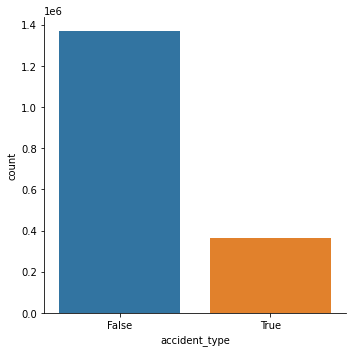

In [321]:
sns.catplot(x="accident_type", kind="count", data=df_train)

### year

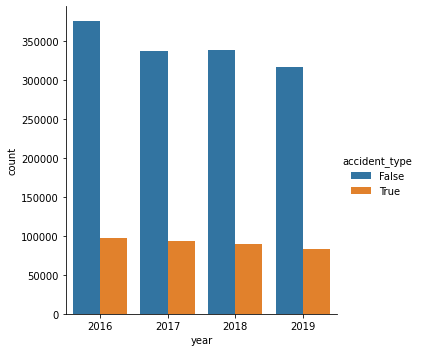

In [322]:
sns.catplot(x="year", kind="count", hue="accident_type", data=df_train)

### department

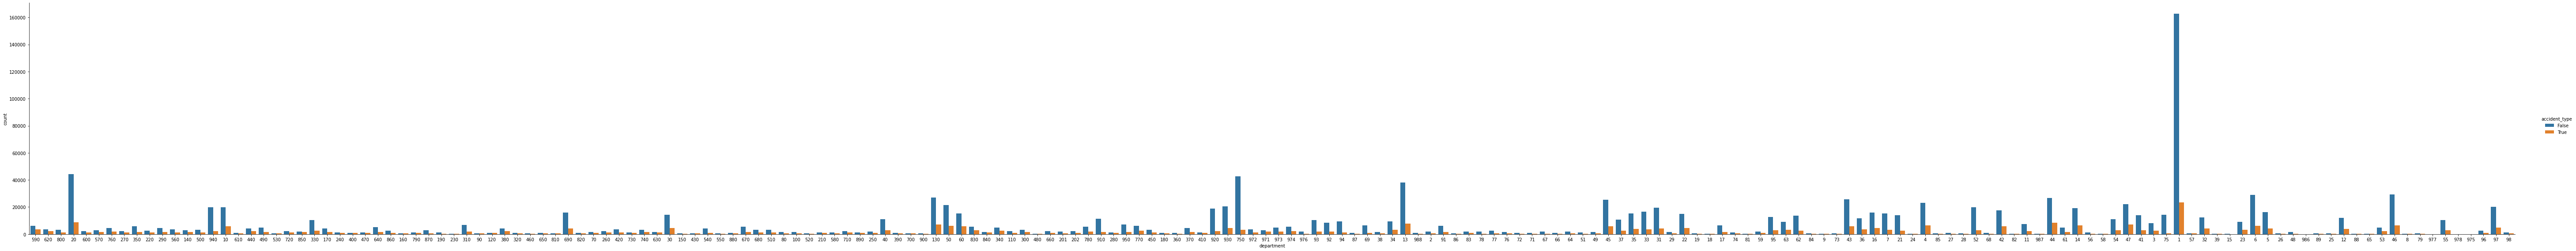

In [323]:
sns.catplot(x="department", kind="count", hue="accident_type", data=df_train, height=8, aspect=10)

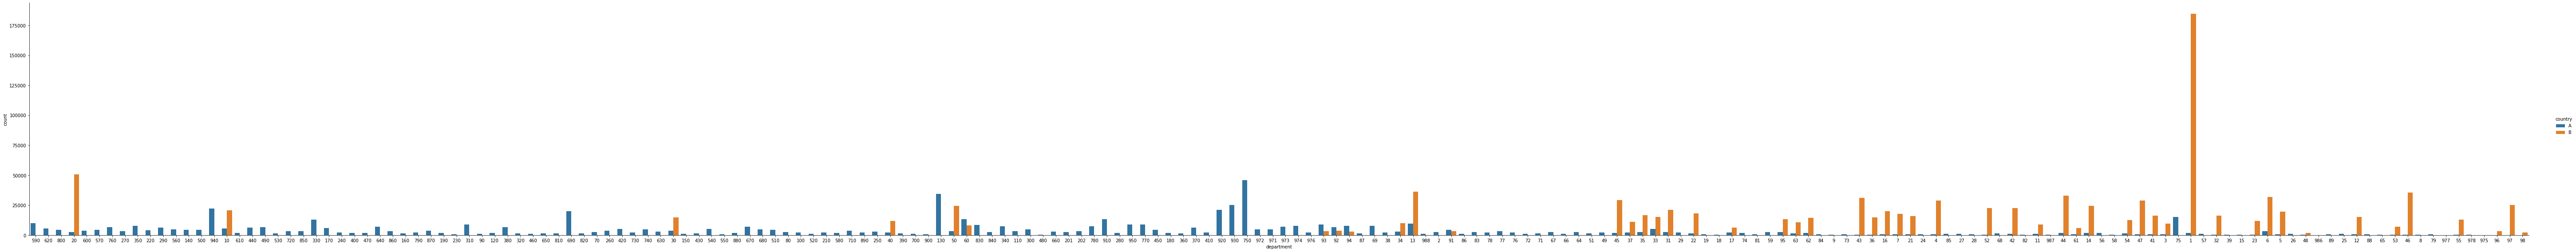

In [324]:
sns.catplot(x="department", kind="count", hue="country", data=df_train, height=8, aspect=10)

### road_category

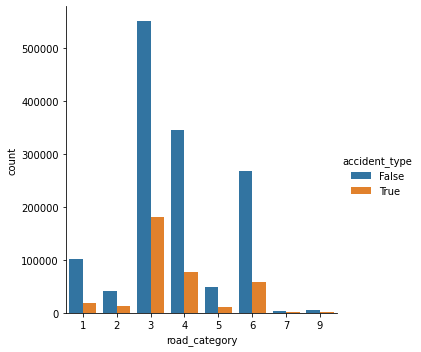

In [325]:
sns.catplot(x="road_category", kind="count", hue="accident_type", data=df_train)

### traffic_type

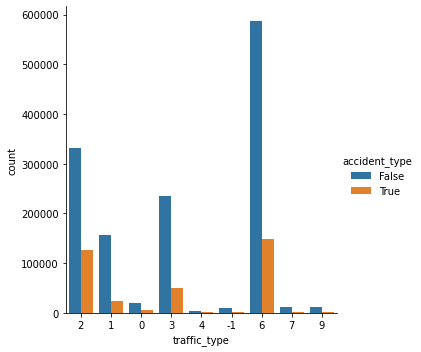

In [326]:
sns.catplot(x="traffic_type", kind="count", hue="accident_type", data=df_train)

### speed_limitation

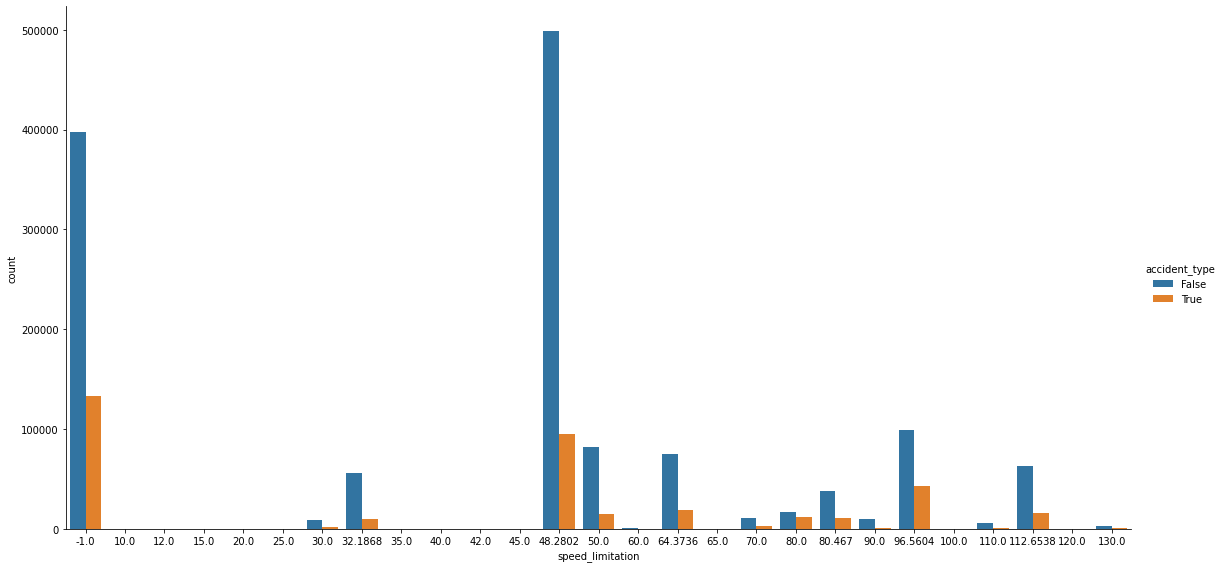

In [327]:
sns.catplot(x="speed_limitation", kind="count", hue="accident_type", data=df_train, height=8, aspect=2)

### intersection

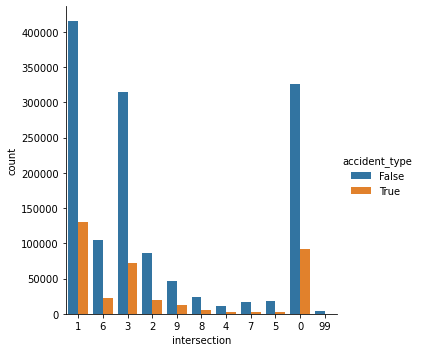

In [328]:
sns.catplot(x="intersection", kind="count", hue="accident_type", data=df_train)

### pedestrian_localisation

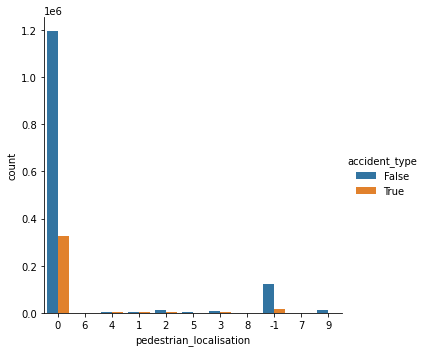

In [329]:
sns.catplot(x="pedestrian_localisation", kind="count", hue="accident_type", data=df_train)

### light_condition

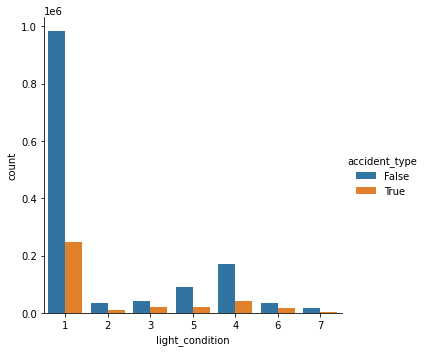

In [330]:
sns.catplot(x="light_condition", kind="count", hue="accident_type", data=df_train)

### weather_conditions

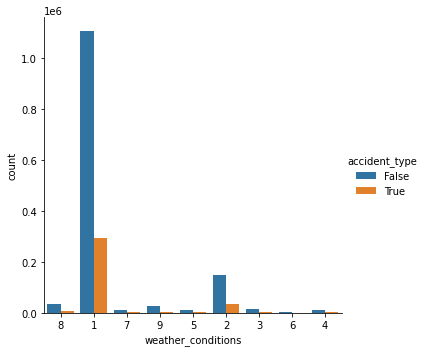

In [331]:
sns.catplot(x="weather_conditions", kind="count", hue="accident_type", data=df_train)

### road_condition

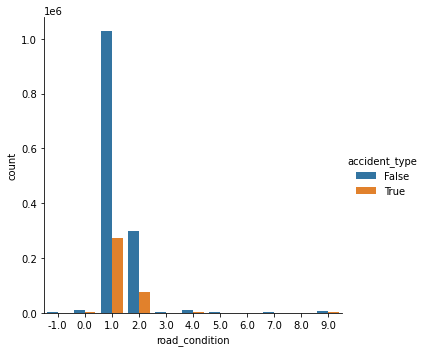

In [332]:
sns.catplot(x="road_condition", kind="count", hue="accident_type", data=df_train)

### obstacle_hit_type

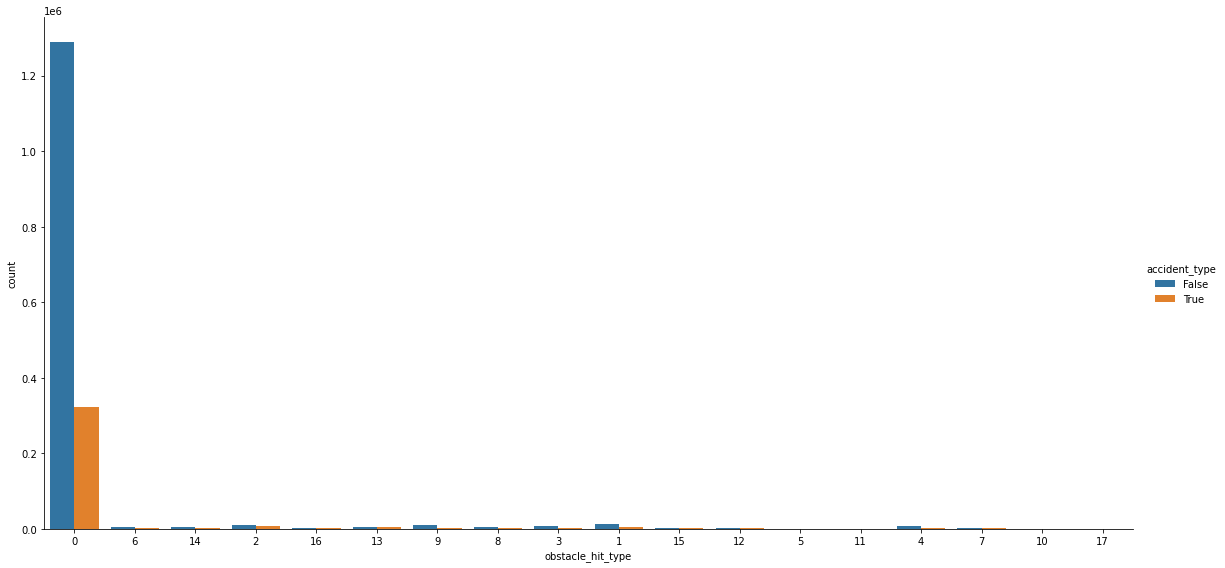

In [333]:
sns.catplot(x="obstacle_hit_type", kind="count", hue="accident_type", data=df_train, height=8, aspect=2)

### person_type

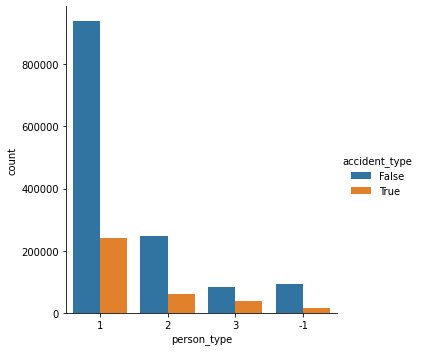

In [334]:
sns.catplot(x="person_type", kind="count", hue="accident_type", data=df_train)

### person_sex

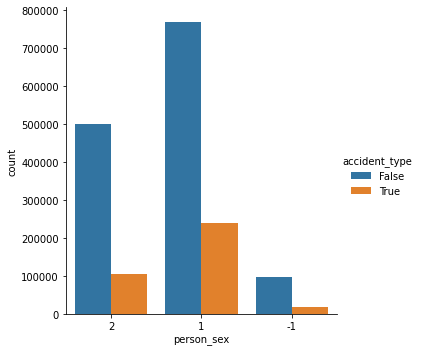

In [335]:
sns.catplot(x="person_sex", kind="count", hue="accident_type", data=df_train)

### vehicule_type

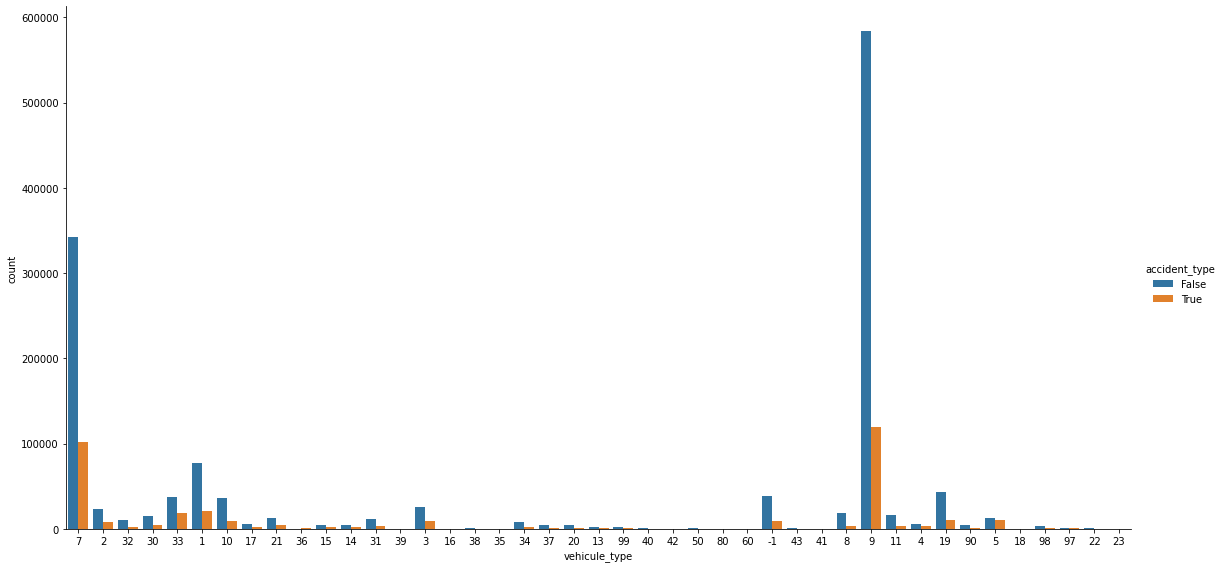

In [336]:
sns.catplot(x="vehicule_type", kind="count", hue="accident_type", data=df_train, height=8, aspect=2)

### principal_maneuver_before_accident

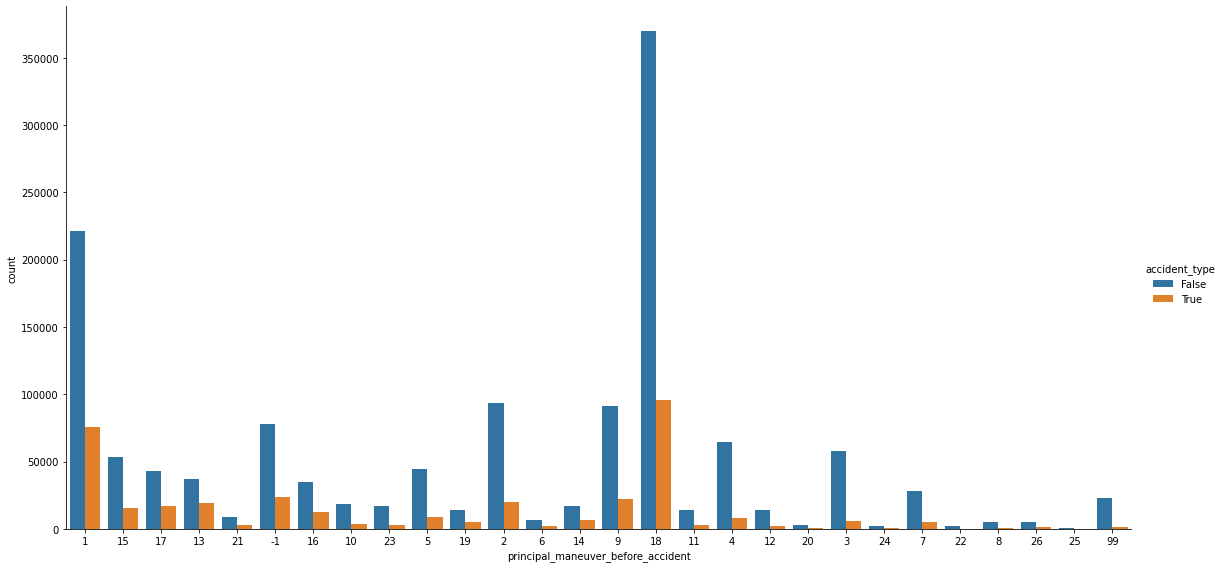

In [337]:
sns.catplot(x="principal_maneuver_before_accident", kind="count", hue="accident_type", data=df_train, height=8, aspect=2)

### vehicule_motor_type

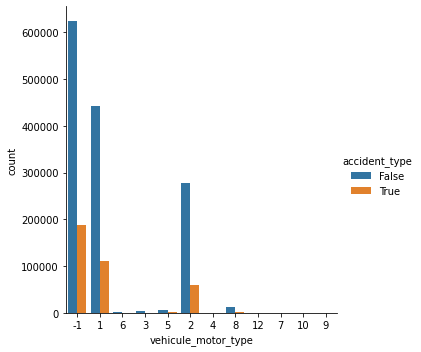

In [338]:
sns.catplot(x="vehicule_motor_type", kind="count", hue="accident_type", data=df_train)

### day

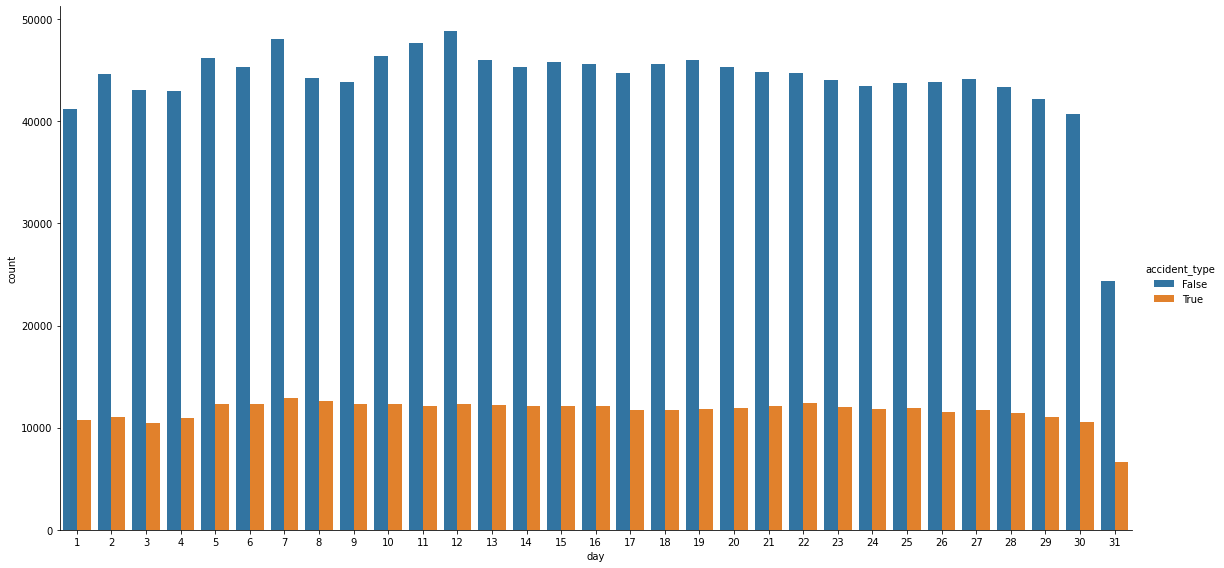

In [339]:
sns.catplot(x="day", kind="count", hue="accident_type", data=df_train, height=8, aspect=2)

### month

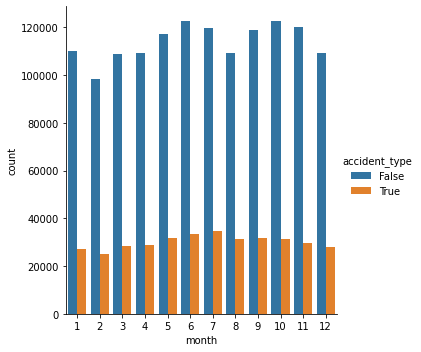

In [340]:
sns.catplot(x="month", kind="count", hue="accident_type", data=df_train)

### country

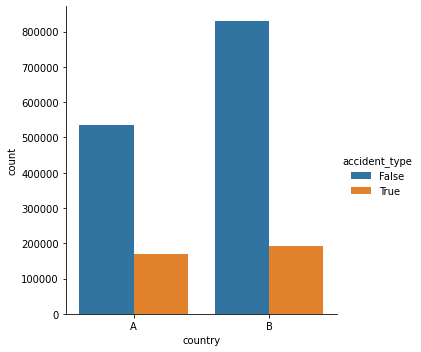

In [341]:
sns.catplot(x="country", kind="count", hue="accident_type", data=df_train)

In [342]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727761 entries, 0 to 2221217
Data columns (total 23 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   accident_id                         object 
 1   year                                int32  
 2   longitude                           object 
 3   latitude                            object 
 4   department                          object 
 5   accident_type                       bool   
 6   road_category                       int32  
 7   traffic_type                        object 
 8   speed_limitation                    float64
 9   intersection                        object 
 10  pedestrian_localisation             object 
 11  light_condition                     object 
 12  weather_conditions                  object 
 13  road_condition                      float64
 14  obstacle_hit_type                   object 
 15  person_type                         object 
 16  

## Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

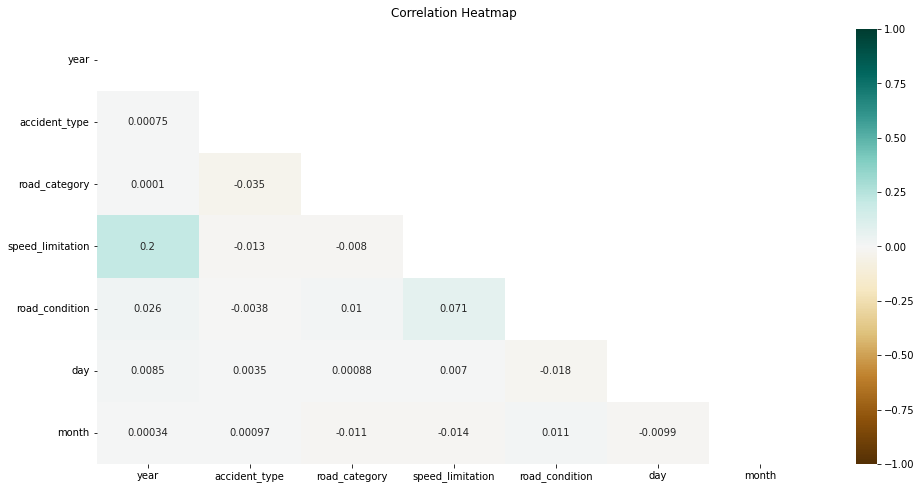

In [343]:
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1,annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Feature engineering

In [344]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727761 entries, 0 to 2221217
Data columns (total 23 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   accident_id                         object 
 1   year                                int32  
 2   longitude                           object 
 3   latitude                            object 
 4   department                          object 
 5   accident_type                       bool   
 6   road_category                       int32  
 7   traffic_type                        object 
 8   speed_limitation                    float64
 9   intersection                        object 
 10  pedestrian_localisation             object 
 11  light_condition                     object 
 12  weather_conditions                  object 
 13  road_condition                      float64
 14  obstacle_hit_type                   object 
 15  person_type                         object 
 16  

In [345]:
train = df_train.drop(["longitude", "latitude", "day", "month"], axis=1)

### Add column with number of people involved in an accident

In [346]:
df_nb_ppl = train[["accident_id","year"]].groupby("accident_id").agg({"year":"count"})
df_nb_ppl

,year
accident_id,
x01600000001,4
x01600000003,2
x01600000004,6
x01600000005,6
x01600000006,2
...,...
x019xx09x9333,2
x019xx09x9436,2
x019xx09xx558,2


In [347]:
df_nb_ppl = df_nb_ppl.rename(columns ={"year": "nb_ppl"}).reset_index()
df_nb_ppl

,accident_id,nb_ppl
0,x01600000001,4
1,x01600000003,2
2,x01600000004,6
3,x01600000005,6
4,x01600000006,2
...,...,...
742808,x019xx09x9333,2
742809,x019xx09x9436,2
742810,x019xx09xx558,2
742811,x019xx09xx871,1


In [348]:
df_nb_ppl

,accident_id,nb_ppl
0,x01600000001,4
1,x01600000003,2
2,x01600000004,6
3,x01600000005,6
4,x01600000006,2
...,...,...
742808,x019xx09x9333,2
742809,x019xx09x9436,2
742810,x019xx09xx558,2
742811,x019xx09xx871,1


In [349]:
train = pd.merge(train, df_nb_ppl, how='left', on="accident_id")

In [350]:
train

,accident_id,year,department,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,country,nb_ppl
0,x01600000001,2016,590,False,3,2,-1.0000,1,0,1,8,1.0,0,1,2,7,1,-1,A,4
1,x01600000001,2016,590,False,3,2,-1.0000,1,0,1,8,1.0,0,1,2,2,15,-1,A,4
2,x01600000001,2016,590,True,3,2,-1.0000,1,0,1,8,1.0,0,1,1,7,1,-1,A,4
3,x01600000001,2016,590,True,3,2,-1.0000,1,0,1,8,1.0,0,1,1,2,15,-1,A,4
4,x0160000000x,2016,590,True,3,1,-1.0000,6,0,1,1,1.0,6,1,1,7,1,-1,A,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727756,x019984107019,2019,98,False,3,6,96.5604,0,0,1,1,2.0,0,1,1,19,18,2,B,2
1727757,x019984107019,2019,98,False,3,6,96.5604,0,0,1,1,2.0,0,1,1,21,18,2,B,2
1727758,x019984107x19,2019,98,False,4,6,96.5604,3,0,1,1,1.0,0,1,1,9,18,2,B,1
1727759,x019984107419,2019,98,False,6,6,48.2802,3,0,1,1,1.0,0,3,1,9,7,2,B,1


In [351]:
train = train.drop(["accident_id"],axis=1)

# Model

In [352]:
X = train.drop(["accident_type"], axis=1)
y = train["accident_type"]

In [353]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727761 entries, 0 to 1727760
Data columns (total 18 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   year                                int32  
 1   department                          object 
 2   road_category                       int32  
 3   traffic_type                        object 
 4   speed_limitation                    float64
 5   intersection                        object 
 6   pedestrian_localisation             object 
 7   light_condition                     object 
 8   weather_conditions                  object 
 9   road_condition                      float64
 10  obstacle_hit_type                   object 
 11  person_type                         object 
 12  person_sex                          object 
 13  vehicule_type                       object 
 14  principal_maneuver_before_accident  object 
 15  vehicule_motor_type                 object 
 16  

In [354]:
categorical_features = ["department",
                    "road_category", 
                    "intersection", 
                    "pedestrian_localisation", 
                    "obstacle_hit_type", 
                    "person_type", 
                    "person_sex", 
                    "vehicule_type", 
                    "principal_maneuver_before_accident",
                    "vehicule_motor_type",
                    "country"]
numeric_features = ["year", "traffic_type", "speed_limitation", "light_condition", "weather_conditions", "road_condition","nb_ppl"]

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.6, random_state = 1)

In [356]:
from lightgbm import LGBMClassifier

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(learning_rate=0.1, num_leaves=400,reg_alpha=2, reg_lambda=2.5, class_weight="balanced"))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("Test accuracy :",balanced_accuracy_score(y_test, y_pred))

Test accuracy : 0.692059442089565


In [360]:
df_test = pd.read_csv("src/test.csv")
df_test = df_test.fillna(-1)
df_test["year"] = df_test["year"].astype(int)
df_test[["latitude","longitude"]] = df_test[["latitude","longitude"]].astype(str).apply(lambda x: x.str.replace(',','.'))
df_test["department"] = df_test["department"].astype(str)
df_test['department'] = np.where(df_test['department'] == "2A", "2", df_test['department'])
df_test['department'] = np.where(df_test['department'] == "2B", "2", df_test['department'])
df_test["road_category"] = df_test["road_category"].astype(int)
df_test["traffic_type"] = df_test["traffic_type"].astype(int).astype(str)
df_test.loc[df_test["country"] == "B", "speed_limitation"] = 1.60934 * df_test.loc[df_test["country"] == "B", "speed_limitation"]
df_test['speed_limitation'] = np.where(df_test['speed_limitation'] < 10, -1, df_test['speed_limitation'])
df_test['speed_limitation'] = np.where(df_test['speed_limitation'] > 130, -1, df_test['speed_limitation'])
df_test["intersection"] = df_test["intersection"].astype(int).astype(str)
df_test["pedestrian_localisation"] = df_test["pedestrian_localisation"].astype(int).astype(str)
df_test["light_condition"] = df_test["light_condition"].astype(int).astype(str)
df_test["weather_conditions"] = df_test["weather_conditions"].astype(int).astype(str)
df_test["obstacle_hit_type"] = df_test["obstacle_hit_type"].astype(int).astype(str)
df_test["person_type"] = df_test["person_type"].astype(int).astype(str)
df_test['person_type'] = np.where(df_test['person_type'] == "4", "-1", df_test['person_type'])
df_test["person_sex"] = df_test["person_sex"].astype(int).astype(str)
df_test["vehicule_type"] = df_test["vehicule_type"].astype(int).astype(str)
df_test['vehicule_type'] = np.where(df_test['vehicule_type'] == "0", "-1", df_test['vehicule_type'])
df_test["principal_maneuver_before_accident"] = df_test["principal_maneuver_before_accident"].astype(int).astype(str)
df_test['principal_maneuver_before_accident'] = np.where(df_test['principal_maneuver_before_accident'] == "0", "-1", df_test['principal_maneuver_before_accident'])
df_test["vehicule_motor_type"] = df_test["vehicule_motor_type"].astype(int).astype(str)
df_test['vehicule_motor_type'] = np.where(df_test['vehicule_motor_type'] == "0", "-1", df_test['vehicule_motor_type'])

df_nb_ppl = df_test[["accident_id","year"]].groupby("accident_id").agg({"year":"count"})
df_nb_ppl = df_nb_ppl.rename(columns ={"year": "nb_ppl"}).reset_index()
test = pd.merge(df_test, df_nb_ppl, how='left', on="accident_id")
test = test.drop(["accident_id", "day", "month", "address_nbr", "longitude", "latitude"], axis=1) 

test

,trustii_id,year,department,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,country,nb_ppl
0,1019363,2020,91,4,2,50.0000,3,-1,1,1,1.0,0,1,1,7,15,1,A,4
1,1019364,2020,91,4,2,50.0000,3,-1,1,1,1.0,0,1,1,33,2,1,A,4
2,1019365,2020,91,4,2,50.0000,3,-1,1,1,1.0,0,1,1,7,15,1,A,4
3,1019366,2020,91,4,2,50.0000,3,-1,1,1,1.0,0,1,1,33,2,1,A,4
4,1019367,2020,91,4,2,50.0000,9,-1,2,7,1.0,0,1,1,7,26,1,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410479,2631697,2020,99,4,6,48.2802,1,0,1,1,1.0,0,1,1,-1,-1,-1,B,1
410480,2631698,2020,99,6,9,48.2802,3,0,1,1,1.0,0,3,2,-1,-1,-1,B,1
410481,2631699,2020,99,4,6,96.5604,8,0,1,1,1.0,0,1,1,-1,-1,-1,B,1
410482,2631700,2020,99,6,6,48.2802,3,0,1,1,1.0,0,1,1,-1,-1,-1,B,1


In [361]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410484 entries, 0 to 410483
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   trustii_id                          410484 non-null  int64  
 1   year                                410484 non-null  int32  
 2   department                          410484 non-null  object 
 3   road_category                       410484 non-null  int32  
 4   traffic_type                        410484 non-null  object 
 5   speed_limitation                    410484 non-null  float64
 6   intersection                        410484 non-null  object 
 7   pedestrian_localisation             410484 non-null  object 
 8   light_condition                     410484 non-null  object 
 9   weather_conditions                  410484 non-null  object 
 10  road_condition                      410484 non-null  float64
 11  obstacle_hit_type         

In [364]:
y_test_pred = pipe.predict(test.drop("trustii_id", axis=1))

In [365]:
y_test_pred

array([False,  True, False, ...,  True,  True,  True])

In [366]:
df_test["accident_type"] = y_test_pred
df_test["accident_type"] = df_test["accident_type"] + 1
sub = df_test.set_index("trustii_id")

In [367]:
# sub.to_csv("final_pred.csv")

In [368]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'traffic_type',
                                                   'speed_limitation',
                                                   'light_condition',
                                                   'weather_conditions',
                                                   'road_condition',
                                                   'nb_ppl']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department',
               

In [369]:
import pickle
filename = 'finalized_model_v2.sav'
pickle.dump(pipe, open(filename, 'wb'))